# Travel Salesman Problem

> Before we get into the details of GRASP let's quickly refresh our memory on the symmetric TSP.

## Standard Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decimal import Decimal, ROUND_HALF_UP
import sys

## `meta-py` imports

In [2]:
# install metapy if running in Google Colab
if 'google.colab' in sys.modules:
    !pip install meta-py

In [3]:
import metapy.tsp.tsp_io as io
import metapy.tsp.euclidean as e
from metapy.tsp.objective import OptimisedSimpleTSPObjective

## Utility functions

* `gen_matrix()` - create travel distance matrix (truncate to int if reqiured.)
* `plot_tour()` - basic plot of a tour.

In [4]:
def gen_matrix(cities, as_integer=False):
    """
    Creates a numpy array of euclidian distances between 2 sets of
    cities
    
    Parameters:
    ----------
    points: numpy.array
        coordinate pairs
    
    as_integers: bool, optional (default=False)
        If true then round to nearest int
        Behaviour: 1.5 -> 2
                   1.2 -> 1
                   1.8 -> 2
                   
    Returns:
    -------
        np.ndarray
            Matrix of city to city costs
    
    """
    size = len(cities)
    matrix = np.zeros(shape=(size, size))
    
    row = 0
    col = 0
    
    for city1 in cities:
        col = 0
        for city2 in cities:
            distance = e.euclidean_distance(city1, city2)
            if as_integer:
                distance = int(Decimal(distance).quantize(0, ROUND_HALF_UP))
            matrix[row, col] = distance
            col+=1
        row +=1
        
    return matrix

In [5]:
def plot_tour(tour, cities, figsize=(6,4)):
    '''
    Plots a tour.  Each city visited is
    labelled in order.  Red point is the initial city.
    
    Params:
    ------
    tour: np.ndarray
        ordered vector representing tour e.g. [1, 4, 2, 3]
        
    cities: np.ndarray
        matrix representing city coordinates
        
    figsize: tuple, optional (default = (6,3))
        tuple of ints for figure size
        
    Returns
    -------
        tuple of matplotlib figure, and axis
    '''

    tour_length = len(tour)
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    #plot points
    ax.plot(cities[:tour_length][:, 0],
            cities[:tour_length][:, 1],'bo')

    #plot lines
    for j in range(len(tour)-1):
        city_1 = tour[j]
        city_2 = tour[j+1]

        #lookup coordinates
        coords_1 = cities[city_1]
        coords_2 = cities[city_2]
        coords = np.vstack([coords_1, coords_2])

        #plot lines
        ax.plot(coords[:,0], coords[:,1], 'g-')
        
        #show order in tour
        ax.text(coords_1[0] + 0.8, coords_1[1] + 0.8, str(j))

    #add in loop back colour code in red...
    city_1 = tour[-1]
    city_2 = tour[0]

    coords_1 = cities[city_1]
    coords_2 = cities[city_2]
    coords = np.vstack([coords_1, coords_2])
    ax.text(coords_1[0] + 0.8, coords_1[1] + 0.8, str(tour_length-1))
    ax.plot(coords[:,0], coords[:,1], 'r--')
        
    return fig, ax

## Read in instance of the TSP and generate cost matrix

We will use the **famous** st70 dataset consisting of 70 cities.

> Note the original data was sourced from the fantastic [TSPLib](http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsplib.html)

In [6]:
#load file
file_path = 'https://raw.githubusercontent.com/TomMonks/meta-py/main/data/st70.tsp'

#number of rows in the file that are meta_data
md_rows = 6

#read the coordinates
cities = io.read_coordinates(file_path, md_rows)

#should be an numpy.ndarray
print(type(cities))

# should be 70 cities
print(cities.shape)

#print first 2 coordinate pairs
print(cities[:2])

<class 'numpy.ndarray'>
(70, 2)
[[64. 96.]
 [80. 39.]]


**Let's genenerate a TSP cost matrix, but limit it to 5 cities so we can see it!**

In [7]:
# generate matrix 
TRUNC = 5
trunc_cities = cities[:TRUNC]
matrix = gen_matrix(trunc_cities, as_integer=True)

matrix

array([[ 0., 59., 73., 55., 33.],
       [59.,  0., 19.,  9., 43.],
       [73., 19.,  0., 19., 49.],
       [55.,  9., 19.,  0., 35.],
       [33., 43., 49., 35.,  0.]])

## Representing a tour

In [8]:
#create ordered list of cities to visit
tour = np.arange(TRUNC)
tour

array([0, 1, 2, 3, 4])

# Visualising a tour

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

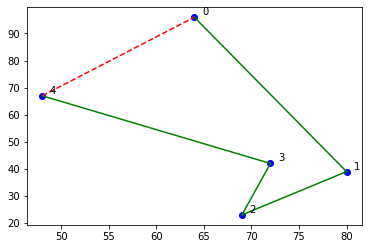

In [9]:
plot_tour(tour, trunc_cities)

## Costing a tour

In [10]:
objective = OptimisedSimpleTSPObjective(matrix)
objective.evaluate(tour)

165.0

## Full tour of all 70 cities

We are working with the st70 dataset.  There is a bit of ambiguity on how costs are calculated on TSPLib, but the best known solution is reported as having a cost of **675**

In [11]:
matrix = gen_matrix(cities, as_integer=True)
tour = np.arange(70)
objective = OptimisedSimpleTSPObjective(matrix)
objective.evaluate(tour)

3410.0